<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Image Basics Assessment

## Complete the Tasks in bold below. Keep in mind, you may need to run some of these tasks as Python scripts.

----------
#### TASK: Open the *dog_backpack.jpg* image from the DATA folder and display it in the notebook. Make sure to correct for the RGB order.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../DATA/dog_backpack.jpg')

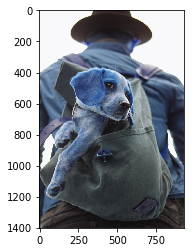

In [4]:
plt.imshow(img)

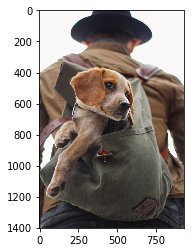

In [5]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

#### TASK: Flip the image upside down and display it in the notebook.

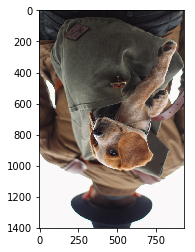

In [6]:
plt.imshow(cv2.flip(imgRGB, flipCode=-1))

#### TASK: Draw an empty RED rectangle around the dogs face and display the image in the notebook.

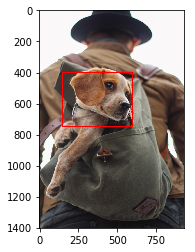

In [7]:
img2 = imgRGB.copy()
cv2.rectangle(img2, (150,400), (600,750),color=(255,0,0),thickness=5)
plt.imshow(img2)

#### TASK: Draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.

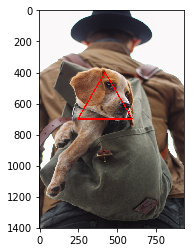

In [8]:
img2 = imgRGB.copy()
pts = np.array([[250,700],[425,400],[600,700]], np.int32)
cv2.polylines(img2, [pts], True, (255,0,0), thickness= 5)
plt.imshow(img2)

In [21]:
pts.shape

(3, 2)

In [19]:
pts = np.array([[250,700],[425,400],[600,700]], np.int32)
pts

array([[250, 700],
       [425, 400],
       [600, 700]])

### BONUS TASK. Can you figure our how to fill in this triangle? It requires a different function that we didn't show in the lecture! See if you can use google search to find it.

[CLICK ME FOR A DIRECT LINK TO THE HINT](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#fillpoly)

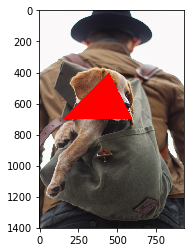

In [24]:
img2 = imgRGB.copy()
pts = np.array([[150,700],[450,400],[600,700]], np.int32)
cv2.fillPoly(img2, [pts],(255,0,0))
plt.imshow(img2)

#### TASK: (NOTE: YOU WILL NEED TO RUN THIS AS A SCRIPT). Create a script that opens the picture and allows you to draw empty red circles whever you click the RIGHT MOUSE BUTTON DOWN.

In [30]:
import cv2
import numpy as np


# Create a function based on a CV2 Event (Left button click)
drawing = False # True if mouse is pressed
ix,iy = -1,-1

# mouse callback function
def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        # When you click DOWN with left mouse button drawing is set to True
        drawing = True
        # Then we take note of where that mouse was located
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        # Now the mouse is moving
        if drawing == True:
            # If drawing is True, it means you've already clicked on the left mouse button
            # We draw a rectangle from the previous position to the x,y where the mouse is
            cv2.rectangle(imgRGB,(ix,iy),(x,y),(0,255,0),-1)
           

    elif event == cv2.EVENT_LBUTTONUP:
        # Once you lift the mouse button, drawing is False
        drawing = False
        # we complete the rectangle.
        cv2.rectangle(imgRGB,(ix,iy),(x,y),(0,255,0),-1)
        
        

# Create a black image
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = np.zeros((512,512,3), np.uint8)
# This names the window so we can reference it 
cv2.namedWindow(winname='my_drawing')
# Connects the mouse button to our callback function
cv2.setMouseCallback('my_drawing',draw_rectangle)

while True: #Runs forever until we break with Esc key on keyboard
    # Shows the image window
    cv2.imshow('my_drawing',imgRGB)
    # EXPLANATION FOR THIS LINE OF CODE:
    # https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163
    
    # CHECK TO SEE IF ESC WAS PRESSED ON KEYBOARD
    if cv2.waitKey(1) & 0xFF == 27:
        break
# Once script is done, its usually good practice to call this line
# It closes all windows (just in case you have multiple windows called)
cv2.destroyAllWindows()